<a href="https://colab.research.google.com/github/ruan64/Analise-de-Filmes-Dataset/blob/master/R_em_PY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalando bibliotecas Pandas e Matplotlib
!pip install pandas matplotlib seaborn scipy

In [ ]:
#Importando as Bibliotecas: Pandas, matplotlib.pyplot, seaborn, numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np


In [ ]:
#Criando a Função CI
def mean_ci(x, conf=0.95):
    x = np.array(x.dropna())
    if len(x) == 0:
        return pd.Series({'y': np.nan, 'ymin': np.nan, 'ymax': np.nan})
    n = len(x)
    m = np.mean(x)
    se = stats.sem(x)
    t_crit = stats.t.ppf((1 + conf) / 2, n - 1)
    ymin = m - t_crit * se
    ymax = m + t_crit * se
    return pd.Series({'y': m, 'ymin': ymin, 'ymax': ymax})

In [ ]:
#Adicionando os dados da Planinha a variavel dados
#Indicando qual separador deve ser usado
dados = pd.read_csv("/content/drive/MyDrive/LucroFilmes.csv", sep=';', encoding='latin1')

In [ ]:
#Percorre as três colunas de interesse
for col in ['LucroLocal', 'LucroMundial', 'Orcamento']:
#Pega a coluna e começa uma sequência de transformações em cadeia
    dados[col] = (
        dados[col]
#Garante que todos os valores da coluna sejam tratados como strings
        .astype(str)
#Remove tudo que não for número, vírgula, ponto, sinal de menos ou ponto decimal
        .str.replace('[^0-9,.-]', '', regex=True)
        .str.replace(',', '.')
        .astype(float)
    )

In [ ]:
dados['DataLancamento'] = pd.to_datetime(dados['DataLancamento'], errors='coerce')
dados['AnoLancamento'] = dados['DataLancamento'].dt.year
dados['MesLancamento'] = dados['DataLancamento'].dt.month

In [ ]:
#exibe o tipo da coluna
print(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401 entries, 0 to 3400
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DataLancamento  3401 non-null   datetime64[ns]
 1   Filme           3401 non-null   object        
 2   Orcamento       3401 non-null   float64       
 3   LucroLocal      3401 non-null   float64       
 4   LucroMundial    3401 non-null   float64       
 5   Distribuidor    3353 non-null   object        
 6   Classificacao   3264 non-null   object        
 7   Genero          3401 non-null   object        
 8   AnoLancamento   3401 non-null   int32         
 9   MesLancamento   3401 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(2), object(4)
memory usage: 239.3+ KB
None


In [ ]:
#exibe as 5 primeiras linhas de cada coluna
print(dados.head())

  DataLancamento                             Filme  Orcamento   LucroLocal  \
0     2007-06-22                     Evan Almighty     1.7508  100289690.0   
1     1995-07-28                        Waterworld     1.7508   88246220.0   
2     2017-05-12  King Arthur: Legend of the Sword     1.7508   39175066.0   
3     2013-12-25                          47 Ronin     1.7508   38362475.0   
4     2018-06-22    Jurassic World: Fallen Kingdom     1.7008  416769345.0   

   LucroMundial   Distribuidor Classificacao    Genero  AnoLancamento  \
0  1.741313e+08      Universal            PG   Comedia           2007   
1  2.642462e+08      Universal         PG-13      Acao           1995   
2  1.399507e+08  WarnerÂ Bros.         PG-13  Aventura           2017   
3  1.517168e+08      Universal         PG-13      Acao           2013   
4  1.304866e+09      Universal         PG-13      Acao           2018   

   MesLancamento  
0              6  
1              7  
2              5  
3             12

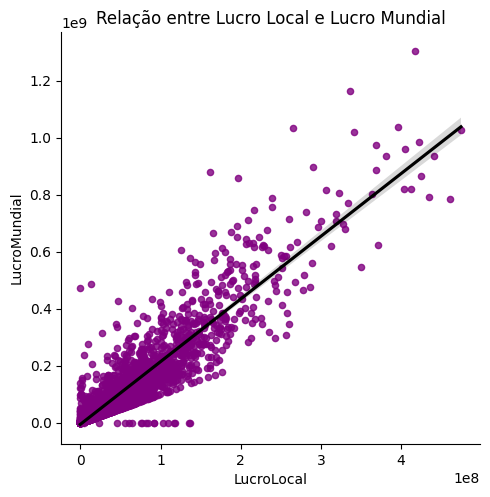

In [ ]:
#Gerando Gráfico de disperção
#Indicando o valor dos eixos X e Y
sns.lmplot(data=dados, x='LucroLocal', y='LucroMundial',
#Desig do Gráfico
           scatter_kws={'s': 20, 'color': 'purple'},
           line_kws={'color': 'black'})
#Titulo do Gráfico
plt.title('Relação entre Lucro Local e Lucro Mundial')
#Exibir Gráfico
plt.show()

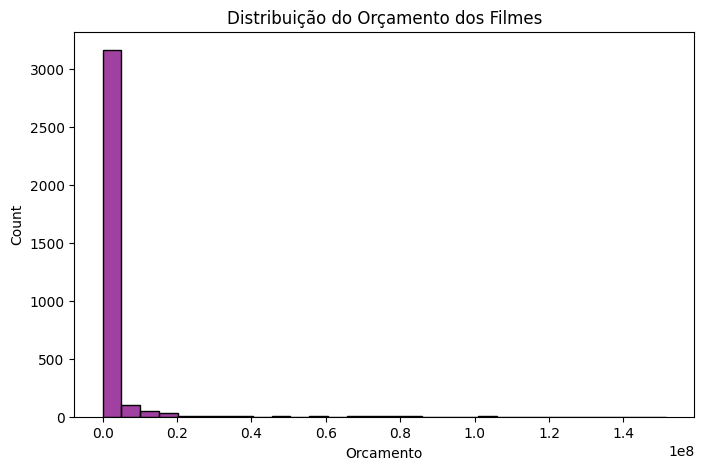

In [ ]:
#Gerando Gráfico com o tamanho 8 e 5 de largura e complimento
plt.figure(figsize=(8,5))
#Indicando quais valores ficaram nos eixos X e Y
#Desig do Gráfico
sns.histplot(data=dados, x='Orcamento', bins=30, edgecolor='black', color='purple')
#Titulo do Gráfico
plt.title('Distribuição do Orçamento dos Filmes')
#Exibir Gráfico
plt.show()

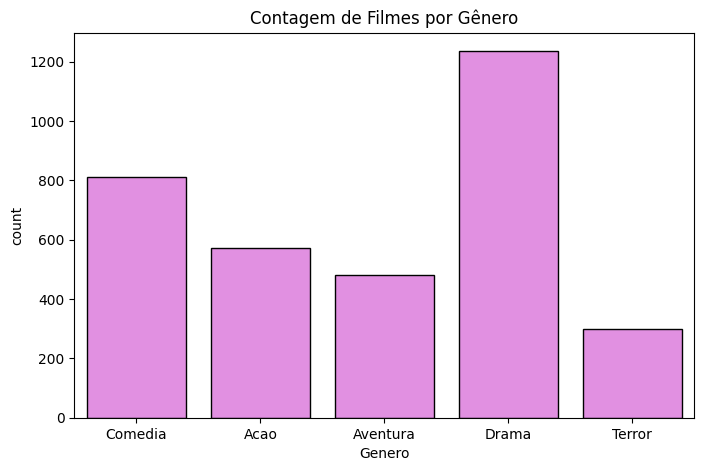

In [ ]:
#Gerando Gráfico com 8 e 5 de largura e comprimento
plt.figure(figsize=(8,5))
#Adicionando valores aos eixos X e Y
#Mudando a cor do grafico
sns.countplot(data=dados, x='Genero', edgecolor='black', color = "violet")
#Adicionando título ao grafico
plt.title('Contagem de Filmes por Gênero')
#exibir gráfico
plt.show()

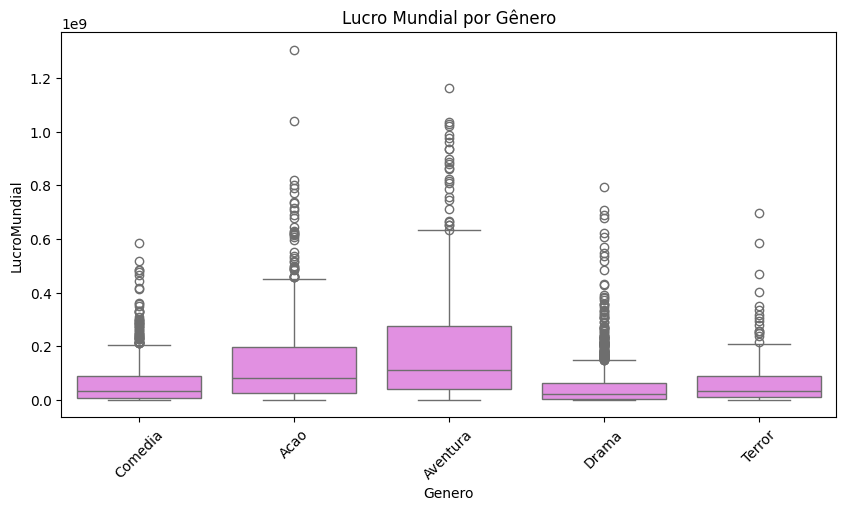

In [ ]:
#Gerando Gráfico com 10 e 5 de largura e comprimento
plt.figure(figsize=(10,5))
#Adicionando valores para o eixo X e Y
#Alterando cores do gráfico
sns.boxplot(data=dados, x='Genero', y='LucroMundial', color = "violet")
#Adicionando titulo do gráfico
plt.title('Lucro Mundial por Gênero')
#Alterando a rotação dos gêneros dos filmes
plt.xticks(rotation=45)
#Exibir gráfico
plt.show()

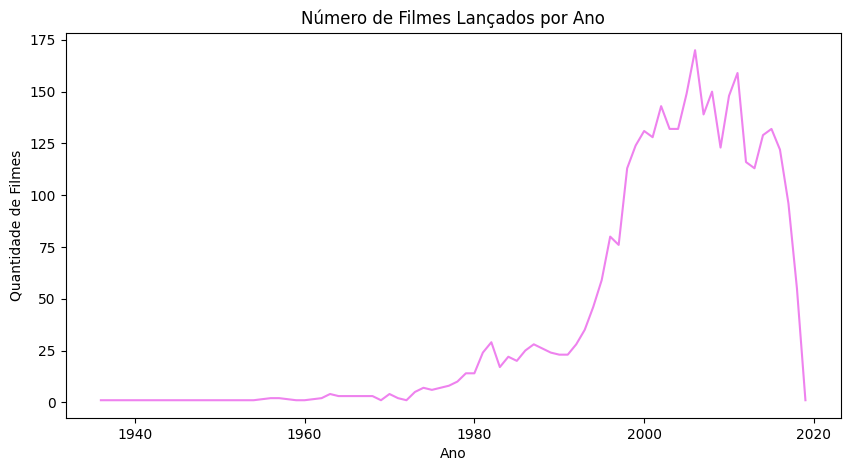

In [ ]:
#Gerando gráfico de tamanho 10 e 5 de altura e complimento
plt.figure(figsize=(10,5))
# Contagem de quantos registros há por ano
# Ordena os anos em ordem crescente
dados['AnoLancamento'].value_counts().sort_index().plot(kind='line', color = "violet")
#Adiciona tilulo no gráico
plt.title('Número de Filmes Lançados por Ano')
#adicionas a palavra ano no eixo x
plt.xlabel('Ano')
#adicionas a palavra ano no eixo Y
plt.ylabel('Quantidade de Filmes')
#Exibe gráfico
plt.show()


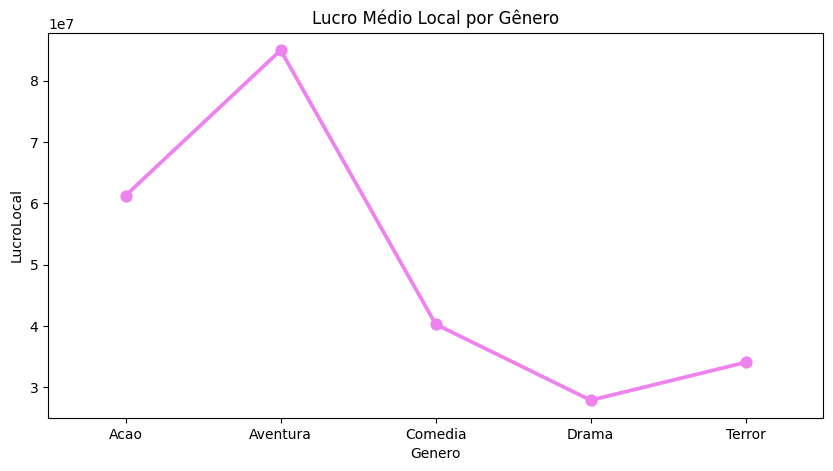

In [ ]:
#Gerando a variavel Lucro Médio
#Agrupando a variavel genero por LucroLocaL
lucro_medio = dados.groupby('Genero', dropna=True)['LucroLocal'].mean().reset_index()
#Gerando o gráfico com 10 e 5 de altura e largura
plt.figure(figsize=(10,5))
#Adicionado valores aos eixos X e Y
#Mudando a cor do gráfico
sns.pointplot(data=lucro_medio, x='Genero', y='LucroLocal', color='violet')
#Adicionando título ao gráfico
plt.title('Lucro Médio Local por Gênero')
#exibir gráfico
plt.show()

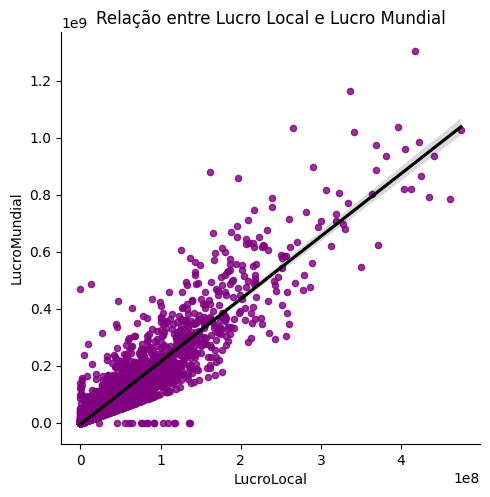

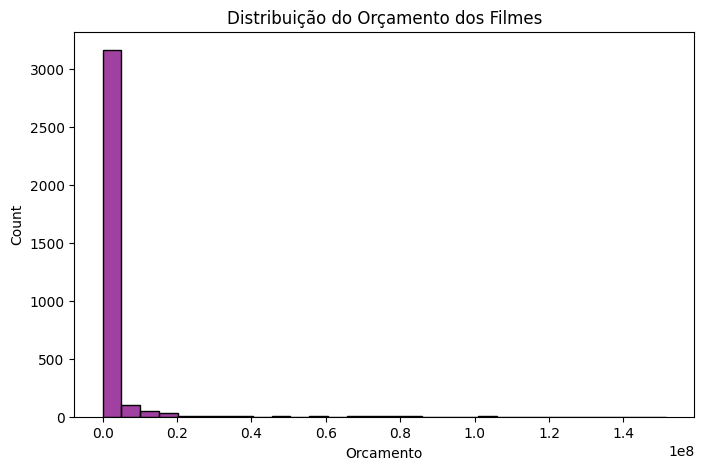

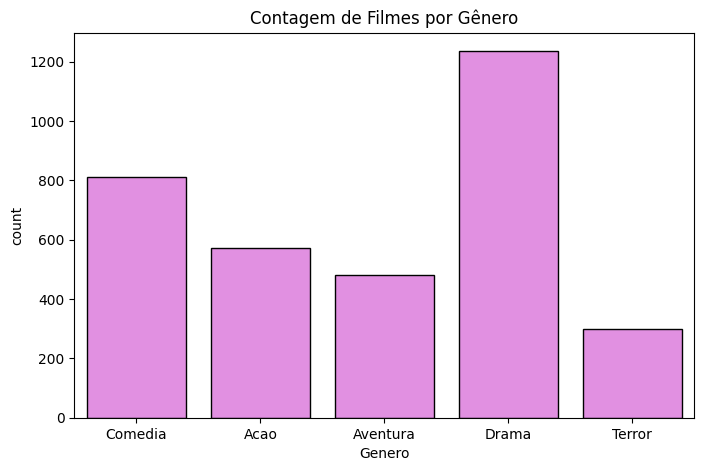

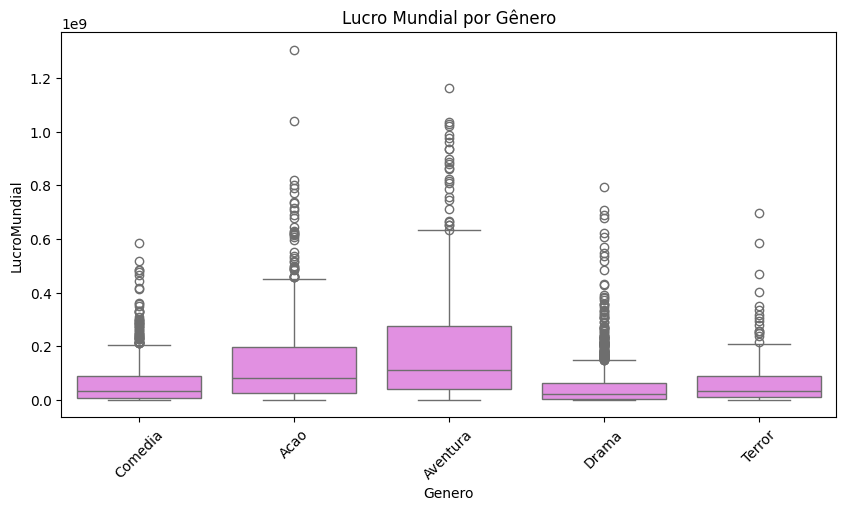

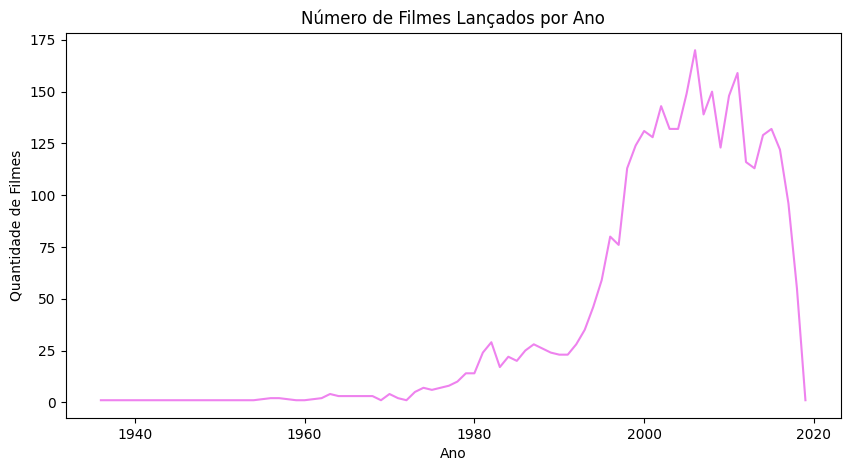

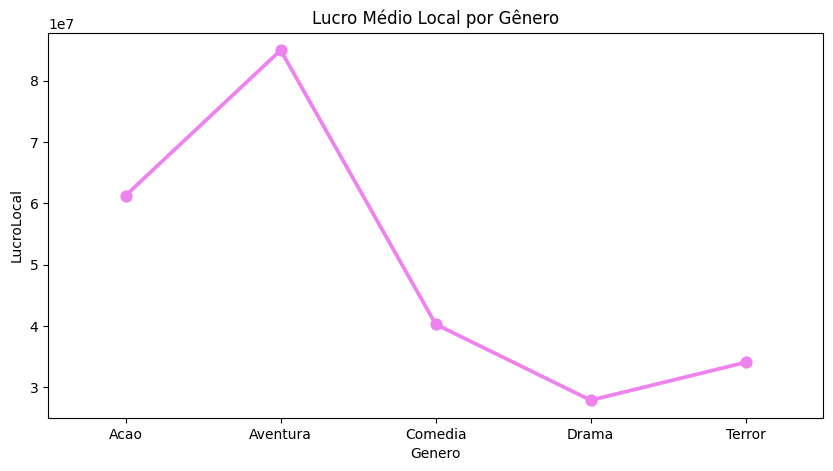

In [ ]:
#Redenrizando tudo de uma vez

#Criando a Função CI
def mean_ci(x, conf=0.95):
    x = np.array(x.dropna())
    if len(x) == 0:
        return pd.Series({'y': np.nan, 'ymin': np.nan, 'ymax': np.nan})
    n = len(x)
    m = np.mean(x)
    se = stats.sem(x)
    t_crit = stats.t.ppf((1 + conf) / 2, n - 1)
    ymin = m - t_crit * se
    ymax = m + t_crit * se
    return pd.Series({'y': m, 'ymin': ymin, 'ymax': ymax})

    dados['DataLancamento'] = pd.to_datetime(dados['DataLancamento'], errors='coerce')
dados['AnoLancamento'] = dados['DataLancamento'].dt.year
dados['MesLancamento'] = dados['DataLancamento'].dt.month

#Gerando Gráfico de disperção
#Indicando o valor dos eixos X e Y
sns.lmplot(data=dados, x='LucroLocal', y='LucroMundial',
#Desig do Gráfico
           scatter_kws={'s': 20, 'color': 'purple'},
           line_kws={'color': 'black'})
#Titulo do Gráfico
plt.title('Relação entre Lucro Local e Lucro Mundial')
#Exibir Gráfico
plt.show()

#Gerando Gráfico com o tamanho 8 e 5 de largura e complimento
plt.figure(figsize=(8,5))
#Indicando quais valores ficaram nos eixos X e Y
#Desig do Gráfico
sns.histplot(data=dados, x='Orcamento', bins=30, edgecolor='black', color='purple')
#Titulo do Gráfico
plt.title('Distribuição do Orçamento dos Filmes')
#Exibir Gráfico
plt.show()

#Gerando Gráfico com 8 e 5 de largura e comprimento
plt.figure(figsize=(8,5))
#Adicionando valores aos eixos X e Y
#Mudando a cor do grafico
sns.countplot(data=dados, x='Genero', edgecolor='black', color = "violet")
#Adicionando título ao grafico
plt.title('Contagem de Filmes por Gênero')
#exibir gráfico
plt.show()

#Gerando Gráfico com 10 e 5 de largura e comprimento
plt.figure(figsize=(10,5))
#Adicionando valores para o eixo X e Y
#Alterando cores do gráfico
sns.boxplot(data=dados, x='Genero', y='LucroMundial', color = "violet")
#Adicionando titulo do gráfico
plt.title('Lucro Mundial por Gênero')
#Alterando a rotação dos gêneros dos filmes
plt.xticks(rotation=45)
#Exibir gráfico
plt.show()

#Gerando gráfico de tamanho 10 e 5 de altura e complimento
plt.figure(figsize=(10,5))
# Contagem de quantos registros há por ano
# Ordena os anos em ordem crescente
dados['AnoLancamento'].value_counts().sort_index().plot(kind='line', color = "violet")
#Adiciona tilulo no gráico
plt.title('Número de Filmes Lançados por Ano')
#adicionas a palavra ano no eixo x
plt.xlabel('Ano')
#adicionas a palavra ano no eixo Y
plt.ylabel('Quantidade de Filmes')
#Exibe gráfico
plt.show()

#Gerando a variavel Lucro Médio
#Agrupando a variavel genero por LucroLocaL
lucro_medio = dados.groupby('Genero', dropna=True)['LucroLocal'].mean().reset_index()
#Gerando o gráfico com 10 e 5 de altura e largura
plt.figure(figsize=(10,5))
#Adicionado valores aos eixos X e Y
#Mudando a cor do gráfico
sns.pointplot(data=lucro_medio, x='Genero', y='LucroLocal', color='violet')
#Adicionando título ao gráfico
plt.title('Lucro Médio Local por Gênero')
#exibir gráfico
plt.show()